In [63]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
plt.style.use('fivethirtyeight')

In [4]:
placement=pd.read_csv("placement.csv")
placement.shape

(200, 2)

In [5]:
placement.head(3)

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25


In [6]:
placement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cgpa     200 non-null    float64
 1   package  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [8]:
placement.describe().T

,count,mean,std,min,25%,50%,75%,max
cgpa,200.0,6.99050,1.069409,4.26,6.1900,6.965,7.7375,9.58
package,200.0,2.99605,0.691644,1.37,2.4875,2.995,3.4925,4.62


In [25]:
def plot(numerical):
    fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
    sns.kdeplot(data=placement,x=numerical,ax=ax[0],fill=True,color='purple')
    sns.boxplot(data=placement,y=numerical,ax=ax[1],color='red')

In [26]:
numerical_features=[cols for cols in placement.columns if placement.dtypes[cols] in ['float64']]
numerical_features

['cgpa', 'package']

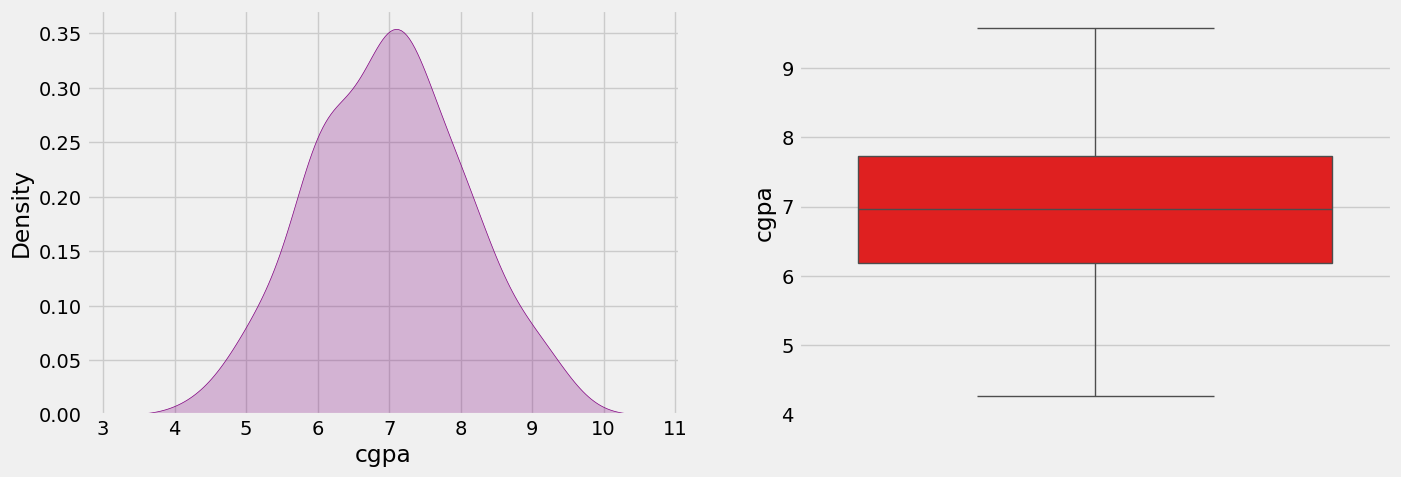

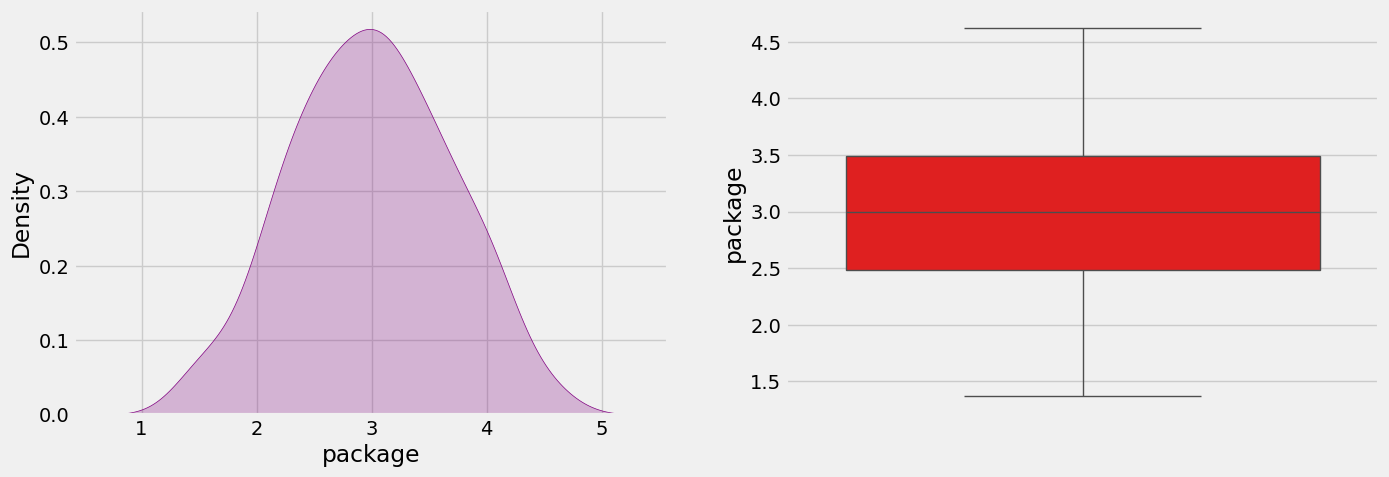

In [27]:
for i in numerical_features:
    plot(i)

In [32]:
print(f"The skewness of Package is {round(placement['package'].skew(),2)}")
print(f"The skewness of CGPA is {round(placement['cgpa'].skew(),2)}")

The skewness of Package is -0.0
The skewness of CGPA is 0.03


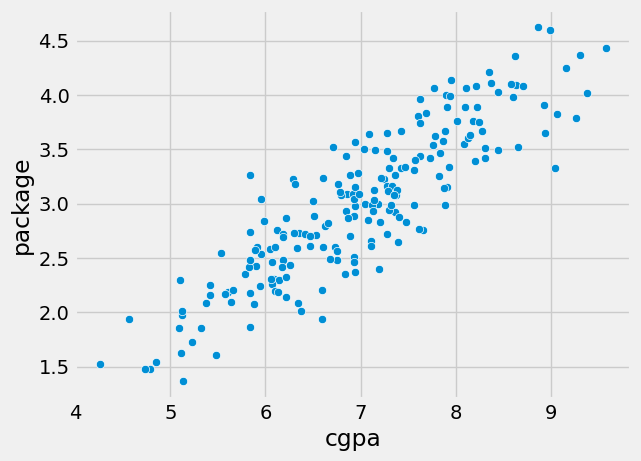

In [37]:
sns.scatterplot(data=placement,y='package',x='cgpa')

plt.show()

In [49]:
X=placement[['cgpa']] #Independent features should be dataframe or 2D array
Y=placement['package']

In [50]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [51]:
linear=LinearRegression()

In [52]:
linear.fit(X_train,Y_train)

LinearRegression()

In [54]:
Y_pred=linear.predict(X_test)

In [64]:
print(f"R2 score:{r2_score(Y_test,Y_pred)}")
print(f"MSE:{mean_squared_error(Y_test,Y_pred)}")
print(f"MAE:{mean_absolute_error(Y_test,Y_pred)}")

R2 score:0.7681105472626016
MSE:0.12398652215181498
MAE:0.28131492202323183


In [59]:
linear.coef_

array([0.5623945])

In [60]:
linear.intercept_

np.float64(-0.9329694897307101)

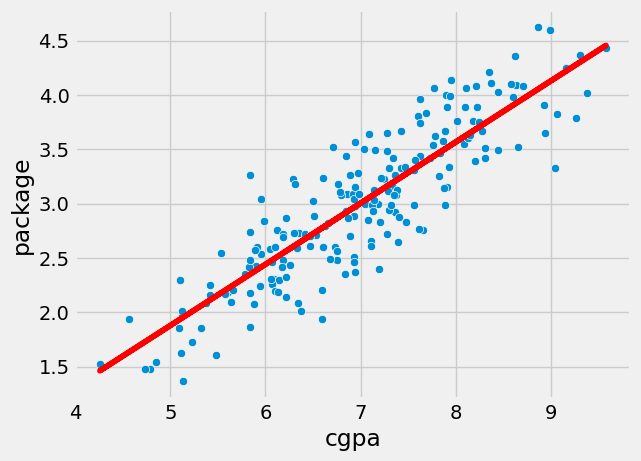

In [62]:
sns.scatterplot(data=placement,y='package',x='cgpa')
plt.plot(X_train,linear.predict(X_train),color='red')

plt.show()